In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Risk Neutral Binomial Pricing

In [2]:
def up_move(sigma, time):
    #size of the up move factor
    #sigma is annual Volatility
    #time is the length of time in the model
    return np.exp(sigma * np.sqrt(time))

In [3]:
def down_move(up_move):
    #size fo the down move factor
    #the down move factor is the inverse of the upmove factor
    return 1/up_move

In [4]:
def up_rn_prob(rate, time, down_move, up_move):
    #risk neutral probability of an upward move
    #rate is the applicable risk free annual interest rate, continuously compounded
    #time is as previous
    return (np.exp(rate * time)- down_move)/(up_move - down_move)

In [5]:
def down_rn_prob(up_rn_prob):
    #risk neutral probability of an downward move
    #probabilities must sum to 1, in 2 state world down propbability is 1- up probability
    return 1-up_rn_prob

In [6]:
def up_price(price, up_move):
    #the stock value at time, t in up state
    #price is the current stock price
    return price*up_move

def down_price(price, down_move):
    #the stock value at time t, in down state
    #price is the current stock price
    return price*down_move

In [7]:
s = 0.14
t = 1
price = 20
rate = 0.04

u = up_move(s,t)
d = down_move(u)

upr = up_rn_prob(rate,t,d,u)
dpr = down_rn_prob(upr)

su = up_price(price,u)
sd = down_price(price,d)

print(f"The up move factor is: {u}.")
print(f"The down move factor is: {d}.")
print(f"The risk neutral probability of up-state is: {upr}.")
print(f"The risk neutral probability of down-state is: {dpr}.")
print(f"The stock price in the up-state is: {su}.")
print(f"The stock price in the down-state is: {sd}.")

The up move factor is: 1.1502737988572274.
The down move factor is: 0.8693582353988057.
The risk neutral probability of up-state is: 0.6103347806108977.
The risk neutral probability of down-state is: 0.38966521938910226.
The stock price in the up-state is: 23.00547597714455.
The stock price in the down-state is: 17.387164707976115.


In [8]:
def future_upcall_value(price, up_price):
    #call value at time, t in up state
    #price is the current stock price
    return max(0, up_price-price)

def future_downcall_value(price, down_price):
    #call value at time t, in down state
    #price is the current stock price
    return max(0, down_price-price)

In [9]:
def ev_call(future_upcall_value,up_rn_prob,future_downcall_value,down_rn_prob):
    #expected value of the call option at time t
    return (future_upcall_value * up_rn_prob) + (future_downcall_value * down_rn_prob)

In [10]:
def current_rn_call_value(ev_call,rate, time):
    #rate and time are as previous
    return ev_call/(np.exp(rate*time))

In [11]:
cu = future_upcall_value(price, su)
cd = future_downcall_value(price, sd)

ev = ev_call(cu,upr,cd,dpr)
pv = current_rn_call_value(ev,rate, t)

print(f"The up call payout is: {cu}.")
print(f"The down call payout is: {cd}.")
print(f"The expected value fo the call at time, t is: {ev}.")
print(f"The current call value is: {pv}.")

The up call payout is: 3.005475977144549.
The down call payout is: 0.
The expected value fo the call at time, t is: 1.8343465211418417.
The current call value is: 1.7624207652588852.


In [12]:
def Binomial_Option(price, time, sigma, rate):
    u = up_move(sigma, time)
    d = down_move(u)
    p_u = up_rn_prob(rate, time, d, u)
    p_d = down_rn_prob(p_u)
    s_u = up_price(price, u)
    s_d = down_price(price, d)
    c_u = future_upcall_value(price, s_u)
    c_d = future_downcall_value(price, s_d)
    ev = ev_call(c_u,p_u,c_d,p_d)
    print("The current call value is ${}".format(round(current_rn_call_value(ev,rate, time),2)))

In [13]:
Binomial_Option(20,1,0.14,0.04)

The current call value is $1.76


In [14]:
def Binomial_model(price, time, sigma, rate):
    u = math.exp(sigma * math.sqrt(time))
    d = 1/u
    p_u = (math.exp(rate * time)- d)/(u - d)
    p_d = 1-p_u
    s_u = price*u
    s_d = price*d
    c_u = max(0, s_u-price)
    c_d = max(0,s_d-price)
    ev = (c_u*p_u)+(c_d*p_d)
    print("The current call value is ${}".format(round((ev/(math.exp(rate*time))),2)))

In [15]:
Binomial_model(20,1,0.14,0.04)

The current call value is $1.76


In [16]:
def Binomial_2_step(strike, price, time, sigma, rate):
    #up and down move factors in one period
    t1=time/2
    u = math.exp(sigma * math.sqrt(t1))
    d = 1/u
    
    #risk neutral propbabilities in one period
    p_u = (math.exp(rate * t1)- d)/(u - d)
    p_d = 1-p_u
    
    #future stock prices
    #first step
    s_u = price*u
    s_d = price*d
    #second step
    s_uu = s_u*u
    s_ud = s_u*d
    s_du = s_d*u
    s_dd = s_d*d
    
    #future call prices
    #second step
    c_uu = max(0, s_uu-strike)
    c_ud = max(0, s_ud-strike)
    c_du = max(0, s_du-strike)
    c_dd = max(0, s_dd-strike)
    
    #expected value of the call 
    ev = (p_u*p_u*c_uu)+(p_u*p_d*c_ud)+(p_d*p_u*c_du)+(p_d*p_d*c_dd)
    
    #present value of the call
    pv = (ev/(math.exp(rate*time)))
    
    print("The current call value is ${}".format(round(pv,2)))
    

In [17]:
Binomial_2_step(20,20,2,0.14,0.04)

The current call value is $2.22


In [18]:
#put call parity - can value a put option based on a call option for the same stock

def put(call, price, strike, rate, t):
    print("The price of a corresponding put option is ${}.".format(
        round(call - price + strike*(np.exp(-rate*t)), 2)))

In [19]:
put(2.22,20,20,.04,2)

The price of a corresponding put option is $0.68.


In [20]:
put(1.76,20,20,.04,1)

The price of a corresponding put option is $0.98.


In [41]:
#up move probability changes to account for different option scenarios

#up move probability with dividend yield
def up_rn_prob_div(rate,q, time, down_move, up_move):
    #risk neutral probability of an upward move
    #rate is the applicable risk free annual interest rate, continuously compounded
    #q represent the dividend yield
    return (np.exp(rate-q * time)- down_move)/(up_move - down_move)


#up move probability with underlying asset in a foreign currency
def up_rn_prob_fc(rdc, rfc, time, down_move, up_move):
    #risk neutral probability of an upward move
    #rdc is the applicable risk free annual interest rate, continuously compounded in domestic currency
    #rfc is the applicable risk free annual interest rate, continuously compounded in foreign currency
    return (np.exp(rdc-rfc * time)- down_move)/(up_move - down_move)


#up move probability of a futures contract
def up_rn_prob_futures(down_move, up_move):
    #risk neutral probability of an upward move
    #in a risk neutral setting futures contracts are 0 growth instuments and require no growth factor
    return (1- down_move)/(up_move - down_move)

Instead of storing each node as a variable - to make our calculations more efficient we'll create a matrix

In [21]:
def Binomial_tree(N, T, price, sigma, r, strike, show_tree=False):
    #N is the number of intervales, ie tree layers
    #t is time to maturity
    #generating the length of each time step and the up/down move factors
    t = T/N
    u = np.exp(sigma * np.sqrt(t))
    d = 1/u

    #risk neutral propbabilities in one period
    p_u = (np.exp(r * t)- d)/(u - d)
    p_d = 1-p_u
    
    #creating the stock tree begining with an empty matrix
    stock_tree = np.zeros([N+1,N+1])
    
    #iterating over the matrix and populating the stock price at each node
    for i in range(N+1):
        for j in range(i+1):
            stock_tree[j,i] = price * (u**(i-j))* (d**j)

    #generating the option tree as an empty matrix as well
    call_tree = np.zeros([N+1,N+1])

    #value of the option at time, t
    call_tree[:,N]= np.maximum(np.zeros(N + 1), (stock_tree[:, N] - strike))
    
    #iterating over the matrix using recursion (time, t to now)
    for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
            call_tree[j, i] = (p_u * call_tree[j, i + 1] + p_d * call_tree[j + 1, i + 1])*(np.exp(-r*t))
    
    #Showing our trees if we are asked, if not only printing the call value 
    if show_tree:
        print(stock_tree,"\n\n",call_tree,
              "\n\nThe current option value is ${}".format(round(call_tree[0,0],2)))
    else:
        print("The current option value is ${}".format(round(call_tree[0,0],2)))

In [22]:
Binomial_tree(2,2, 20, 0.14, 0.04, 20, True)

[[20.         23.00547598 26.46259625]
 [ 0.         17.38716471 20.        ]
 [ 0.          0.         15.11567483]] 

 [[2.22228474 3.78968719 6.46259625]
 [0.         0.         0.        ]
 [0.         0.         0.        ]] 

The current option value is $2.22


In [23]:
Binomial_tree(365,1, 20, 0.14, 0.04, 20, False)

The current option value is $1.53


In [24]:
Binomial_tree(730,1, 20, 0.14, 0.04, 20, False)

The current option value is $1.53


In [25]:
Binomial_tree(10000,1, 20, 0.14, 0.04, 20, False)

The current option value is $1.53


In [26]:
#same func as before but without the ability to show the tree
#function returns the current price only

def binomial_tree(N, T, price, sigma, r, strike):
    #N is the number of intervales, ie tree layers
    #t is time to maturity
    #generating the length of each time step and the up/down move factors
    t = T/N
    u = np.exp(sigma * np.sqrt(t))
    d = 1/u

    #risk neutral propbabilities in one period
    p_u = (np.exp(r * t)- d)/(u - d)
    p_d = 1-p_u
    
    #creating the stock tree begining with an empty matrix
    stock_tree = np.zeros([N+1,N+1])
    
    #iterating over the matrix and populating the stock price at each node
    for i in range(N+1):
        for j in range(i+1):
            stock_tree[j,i] = price * (u**(i-j))* (d**j)

    #generating the option tree as an empty matrix as well
    call_tree = np.zeros([N+1,N+1])

    #value of the option at time, t
    call_tree[:,N]= np.maximum(np.zeros(N + 1), (stock_tree[:, N] - strike))
    
    #iterating over the matrix using recursion (time, t to now)
    for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
            call_tree[j, i] = (p_u * call_tree[j, i + 1] + p_d * call_tree[j + 1, i + 1])*(np.exp(-r*t))
    
    return round(call_tree[0,0],2)

In [28]:
#running this cell should take several minutes 

#creating a list range of time steps to iterate over
N = list(range(1,1000))
#initiating an empty list to store the vairous prices
call_prices = []

#creating a list of prices in increasingly small time steps

for n in N:
    call_prices.append(binomial_tree(n,1,20, 0.14, 0.04, 20))

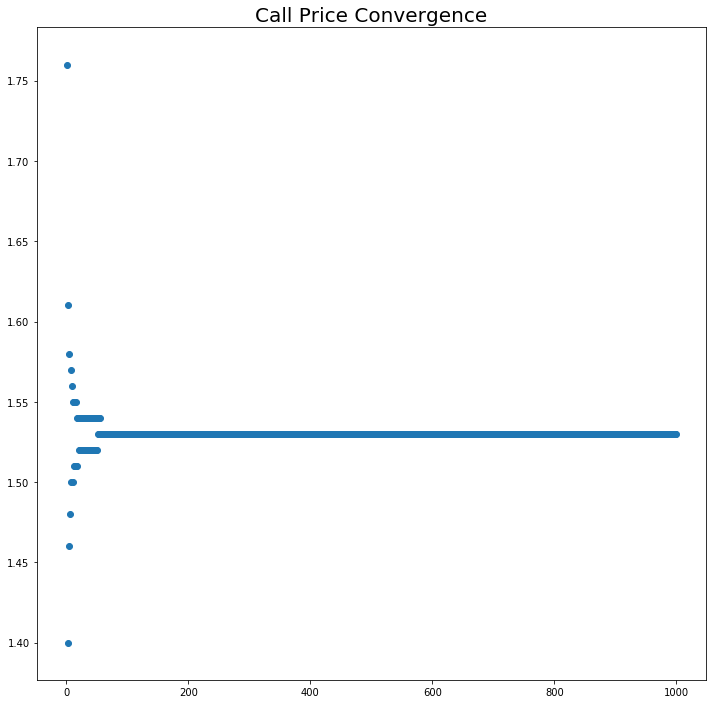

In [30]:
plt.figure(figsize=(12,12))
plt.scatter(N,call_prices)
plt.title("Call Price Convergence", fontsize =20)
plt.show()

As we make the time steps arbitrarily small, the math approaches a continuous time model and the binomial model converges to the black-scholes-merton option pricing model

Often referred to only as the Black-Scholes model, the BSM model is based on the underlying assumption that stock prices follow a lognormal distribution.  

Calculate the Black-Scholes-Merton implied volatility.

Parameters:	
S (float) – underlying asset price
K (float) – strike price
sigma (float) – annualized standard deviation, or volatility
t (float) – time to expiration in years
r (float) – risk-free interest rate
q (float) – annualized continuous dividend rate
flag (str) – ‘c’ or ‘p’ for call or put.

In [50]:
import vollib as vl

In [46]:
#blackscholesmerton (flag, S, K, t, r, sigma, q)
bsm_price = vl.black_scholes_merton.black_scholes_merton('c',20,20,2,0.14,0.4,0)
bsm_price

AttributeError: module 'vollib' has no attribute 'black_scholes_merton'